<a href="https://colab.research.google.com/github/michelymarianocs/portfolio/blob/main/Analisando_os_Dados_do_Airbnb_(Rio_de_Janeiro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df_airbnb = pd.read_csv("https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de identidade criado para identificar cada imóvel
* `name` - nome do referido imóvel
* `host id` - número de identidade do anfitrião (proprietário do imóvel)
* `host name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não possui valores válidos
* `neighbourhood` - nome do bairro
* `latitude` - coordenada geográfica de latitude
* `longitude` - coordenada geográfica de longitude
* `room_hype` -  estilo do quarto
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar 
* `number_of_reviews`- número de reviews a respeito do imóvel
* `last_review` - data do último review a respeito do imóvel
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis que o anfitrião possui para alugar
* `availability_365` - quantidade de dias disponíveis para alugar o imóvel dentro do período de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df_airbnb.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272
35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,359,2021-04-21,2.79,1,139
41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.98102,-43.19172,Entire home/apt,493,3,18,2016-02-09,0.18,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26467 entries, 17878 to 49419302
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            26438 non-null  object 
 1   host_id                         26467 non-null  int64  
 2   host_name                       25610 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   26467 non-null  object 
 5   latitude                        26467 non-null  float64
 6   longitude                       26467 non-null  float64
 7   room_type                       26467 non-null  object 
 8   price                           26467 non-null  int64  
 9   minimum_nights                  26467 non-null  int64  
 10  number_of_reviews               26467 non-null  int64  
 11  last_review                     16643 non-null  object 
 12  reviews_per_month        

Nosso *dataset* possui o total de 26467 entradas e 15 colunas.

In [ ]:
df_airbnb.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
df_airbnb.isnull().sum()

name                                 29
host_id                               0
host_name                           857
neighbourhood_group               26467
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9824
reviews_per_month                  9824
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df_airbnb.isnull().sum() / df_airbnb.shape[0] * 100

name                                0.109570
host_id                             0.000000
host_name                           3.237994
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        37.117920
reviews_per_month                  37.117920
calculated_host_listings_count      0.000000
availability_365                    0.000000
dtype: float64

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_airbnb.isnull().sum() / df_airbnb.shape[0] * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
last_review                        37.117920
reviews_per_month                  37.117920
host_name                           3.237994
name                                0.109570
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
dtype: float64

A variável *`neighbourhood_group`* apresenta 100% dos seus valores nulos.
As variáveis *`last_review`* e *`reviews_per_month`* apresentam mais de 37% de valores nulos. 
A variável *`host_name`* apresenta pouco mais de 3% de valores nulos. 
A variável *`name`* apresenta 0,1% de valores nulos. 
As demais não possuem valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b6c93b510>,
      dtype=object)

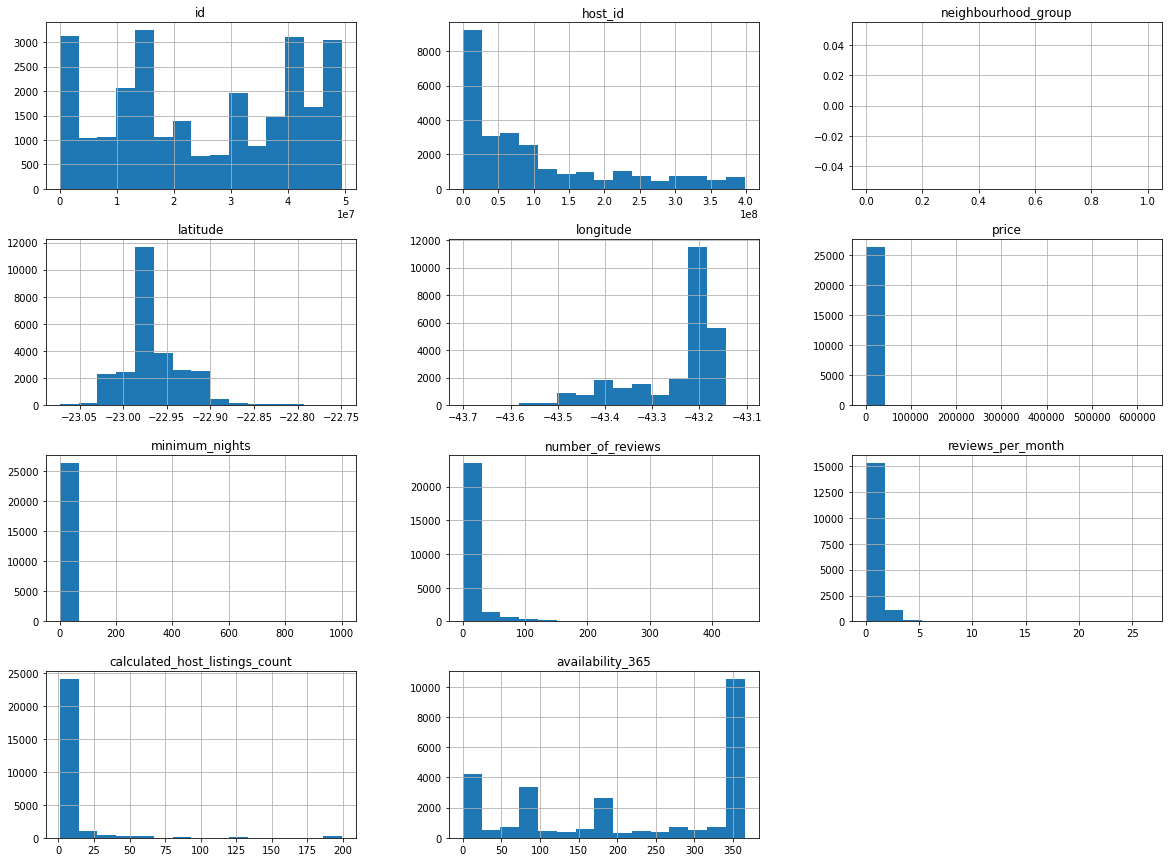

In [ ]:
# plotar o histograma das variáveis numéricas
df_airbnb.hist(bins=15, figsize=(20,15))

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df_airbnb[['price','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26467.000000,26467.00000,26467.000000,16643.000000,26467.000000,26467.000000
mean,734.860052,4.80096,12.417501,0.580291,6.919220,214.943099
std,5274.600381,19.21445,30.313117,0.823784,21.310525,143.136520
min,0.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.00000,0.000000,0.080000,1.000000,88.000000
50%,260.000000,2.00000,2.000000,0.260000,1.000000,223.000000
75%,529.000000,4.00000,9.000000,0.770000,3.000000,364.000000
max,623592.000000,1000.00000,452.000000,26.430000,199.000000,365.000000


Olhando o resumo estatístico acima, podemos extrair algumas observações:

* A variável `price` possui 75% do valor abaixo de 529, porém seu valor máximo é 623592.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights,


Variável minimum_nights
Valores acima de 30: 216 entradas
Em porcentagem equivale a 0.8161% do total de entradas.


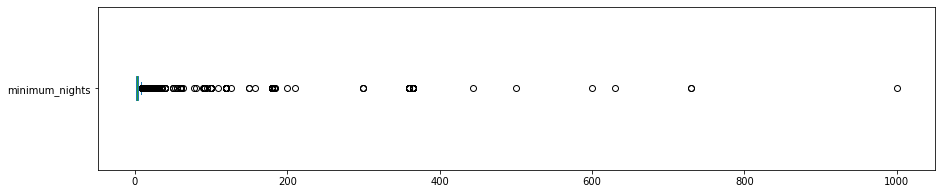

In [ ]:
# minimum_nights
df_airbnb.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))

#ver quantidade de valores acima de 30 dias para minimum_nights
print("Variável minimum_nights")
print("Valores acima de 30: {} entradas".format(len(df_airbnb[df_airbnb.minimum_nights > 30])))
print("Em porcentagem equivale a {:.4f}% do total de entradas.".format((len(df_airbnb[df_airbnb.minimum_nights > 30]) /df_airbnb.shape[0]) * 100))

#### Boxplot para price

Variável price
Valores acima de R$1.500,00: 1773 entradas
Em porcentagem equivale a 6.6989% do total de entradas.


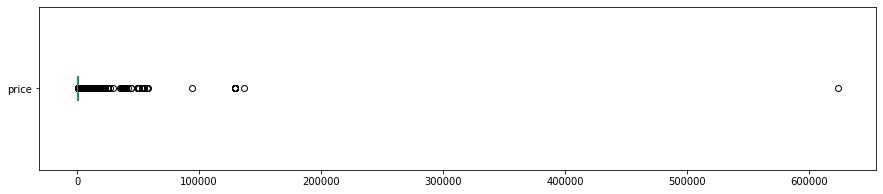

In [ ]:
# price
df_airbnb.price.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de 1500 para price
print("Variável price")
print("Valores acima de R$1.500,00: {} entradas".format(len(df_airbnb[df_airbnb.price > 1500])))
print("Em porcentagem equivale a {:.4f}% do total de entradas.".format((len(df_airbnb[df_airbnb.price > 1500]) /df_airbnb.shape[0]) *100))

#df_airbnb.price.plot(kind='box', vert=False, xlim=(0,100000), figsize=(15,3))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f817795a250>,
      dtype=object)

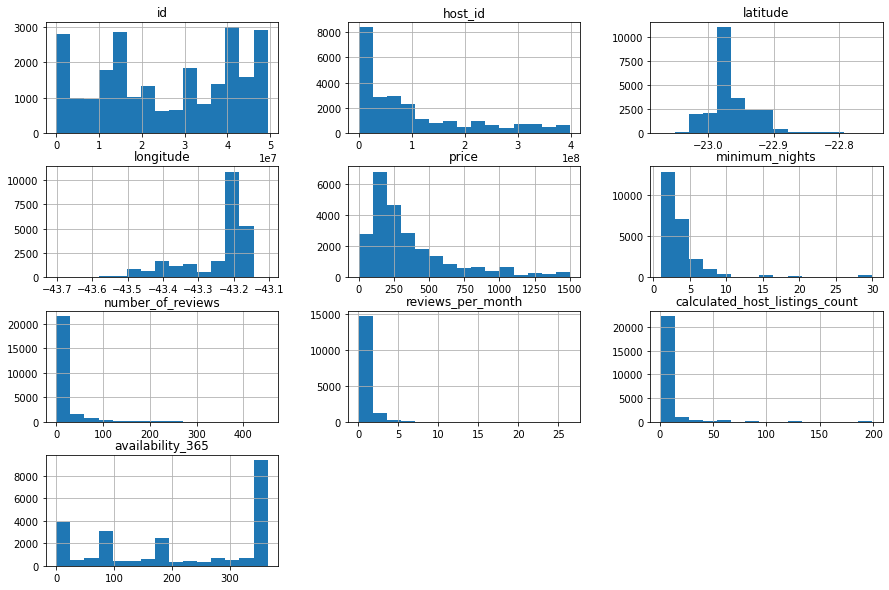

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df_airbnb.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10))


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

In [ ]:
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.130315,-0.161856,-0.175125,0.067542,0.078650
minimum_nights,0.130315,1.000000,-0.060445,-0.097327,-0.044090,-0.019873
number_of_reviews,-0.161856,-0.060445,1.000000,0.642706,-0.047373,-0.066912
reviews_per_month,-0.175125,-0.097327,0.642706,1.000000,-0.013627,-0.130992
calculated_host_listings_count,0.067542,-0.044090,-0.047373,-0.013627,1.000000,0.025664
availability_365,0.078650,-0.019873,-0.066912,-0.130992,0.025664,1.000000


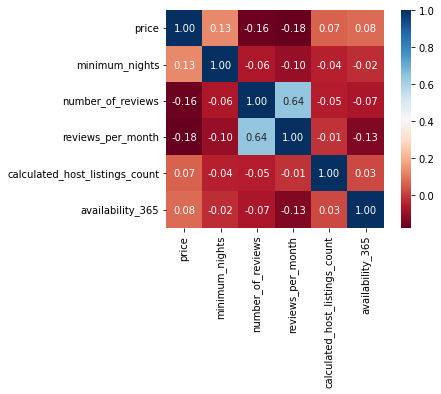

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_airbnb.room_type.value_counts()


Entire home/apt    19132
Private room        6627
Shared room          611
Hotel room            97
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_airbnb.room_type.value_counts() / df_airbnb.shape [0] * 100


Entire home/apt    72.286243
Private room       25.038727
Shared room         2.308535
Hotel room          0.366494
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_airbnb.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
São Cristóvão         7860.445783
Joá                   5327.468085
Bangu                 3255.947368
Anchieta              2848.500000
São Conrado           2453.451163
Saúde                 2050.315789
Alto da Boa Vista     1850.195122
Vila Militar          1408.666667
Caju                  1325.000000
Barra de Guaratiba    1196.181818
Name: price, dtype: float64

Acima, vemos que bairros como Caju, Cavalcanti, R estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [ ]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Complexo do Alemão"]

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10904,17148972,Casa Brota,101966262,Thamyra,Complexo do Alemão,-22.85833,-43.27465,Private room,140,1,6,2018-10-07,0.12,1,90
12119,21448656,Casa 1 quarto alem,155642978,Felipe,Complexo do Alemão,-22.85998,-43.27476,Shared room,900,1,1,2017-11-28,0.02,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

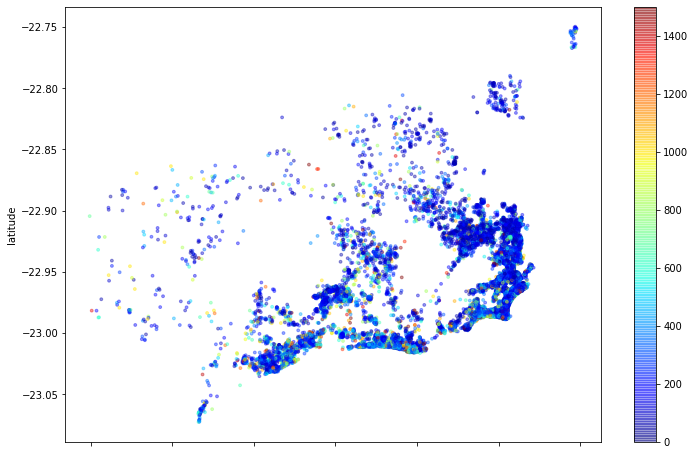

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.